In [4]:
import pandas as pd
import numpy as np
#1
df = pd.read_csv("C:/Users/user/Downloads/archive/online_gaming_behavior_dataset.csv")
df

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


In [11]:
#2
df = df[df["PlayTimeHours"]!=0]

In [19]:
df["PlayTimeHours"]

0        16.271119
1         5.525961
2         8.223755
3         5.265351
4        15.531945
           ...    
40029    20.619662
40030    13.539280
40031     0.240057
40032    14.017818
40033    10.083804
Name: PlayTimeHours, Length: 40034, dtype: float64

In [12]:
df["Rank"] = df["PlayerLevel"]
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Rank
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium,79
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium,11
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High,35
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium,57
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium,95


In [13]:
# Q1
AvgPlayTimeHours = df.groupby("Rank")["PlayTimeHours"].mean().reset_index()
print(AvgPlayTimeHours)

    Rank  PlayTimeHours
0      1      12.135993
1      2      11.819676
2      3      11.974377
3      4      12.338577
4      5      12.179198
..   ...            ...
94    95      11.912481
95    96      11.773877
96    97      11.818981
97    98      11.802654
98    99      11.851457

[99 rows x 2 columns]


In [14]:
# Q2
GroupedMatches = df.groupby("SessionsPerWeek")["PlayerID"].count().reset_index()
print(GroupedMatches)

    SessionsPerWeek  PlayerID
0                 0      1967
1                 1      1980
2                 2      2018
3                 3      2019
4                 4      2091
5                 5      2035
6                 6      1993
7                 7      2137
8                 8      1963
9                 9      1974
10               10      1956
11               11      1962
12               12      2052
13               13      1983
14               14      1958
15               15      1949
16               16      2009
17               17      1958
18               18      1998
19               19      2032


In [15]:
# Q3
df["InGamePurchases"]=df["InGamePurchases"].fillna(0)
df["InGamePurchases"]

0        0
1        0
2        0
3        1
4        0
        ..
40029    0
40030    0
40031    1
40032    1
40033    0
Name: InGamePurchases, Length: 40034, dtype: int64

In [16]:
# Q4
c = df["PlayTimeHours"].corr(df["InGamePurchases"])
print(f"The correlation between PlayTimeHours and InGamePurchases: {c :.2f}")

The correlation between PlayTimeHours and InGamePurchases: -0.01


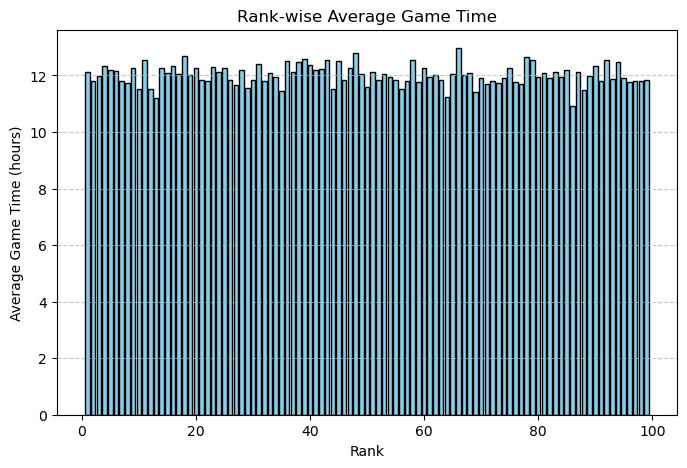

In [17]:
# Q5
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(AvgPlayTimeHours["Rank"], AvgPlayTimeHours["PlayTimeHours"], color='skyblue', edgecolor='black')
plt.xlabel("Rank")
plt.ylabel("Average Game Time (hours)")
plt.title("Rank-wise Average Game Time")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()